# Support Vector Machine vs Vanilla Linear Classifier


In [3]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.4/165.4 kB 121.1 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 263.5 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 290.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 276.9 kB/s eta 0:00:0000:0100:04


In [5]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 229.8 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 177.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 424.4 kB/s eta 0:00:00a 0:00:01


In [7]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 86.2 kB/s eta 0:00:00a 0:00:01


In [8]:
# Load required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [11]:
# load the image data set
digits = datasets.load_digits()
target = digits.target
flatten_digits = digits.images.reshape((len(digits.images), -1))

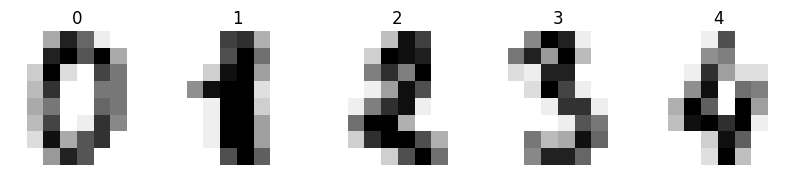

In [14]:
# check some handwritten images in the dataset
_, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (10,4))
for ax, image, label in zip(axes, digits.images, target):
    ax.set_axis_off()
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
    ax.set_title('%i' % label)

## Prepare data

In [15]:
# split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(flatten_digits, target, test_size=0.2)

## Logistic Regression Classification

In [16]:
scaler = StandardScaler()
X_train_logistic = scaler.fit_transform(X_train)
X_test_logistic = scaler.transform(X_test)

In [19]:
# create a logistic Regression
logreg = LogisticRegression(C = 0.01, penalty = 'l1', solver = 'saga', tol = 0.1, multi_class = 'multinomial')
logreg.fit(X_train_logistic, y_train)
y_pred_logistic = logreg.predict(X_test_logistic)

In [21]:
# check accuracy of logistic regression
print("Accuracy: "+str(logreg.score(X_test_logistic, y_test)))

Accuracy: 0.7611111111111111


### Confussion Matrix

In [22]:
label_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cmx = confusion_matrix(y_test, y_pred_logistic, labels=label_names)

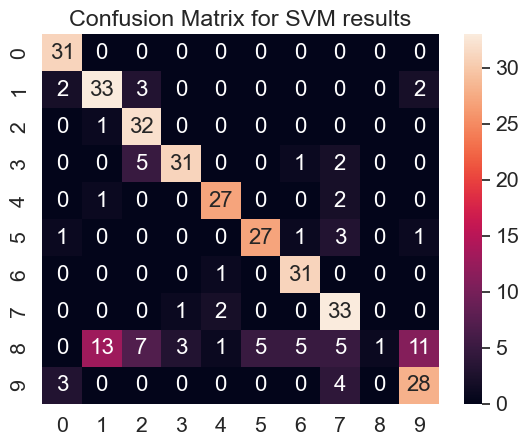

In [23]:
df_cm = pd.DataFrame(cmx)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
title = "Confusion Matrix for SVM results"
plt.title(title)
plt.show()

## SVM Classification

In [24]:
svm_classifier = svm.SVC(gamma='scale')

In [25]:
svm_classifier.fit(X_train, y_train)

SVC()

In [26]:
y_pred_svm = svm_classifier.predict(X_test)

In [27]:
# check the accuracy of the SVM
print("Accuracy: "+str(accuracy_score(y_test, y_pred_svm)))

Accuracy: 0.9916666666666667


### Confussion Matrix

In [28]:
label_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cmx = confusion_matrix(y_test, y_pred_svm, labels=label_names)

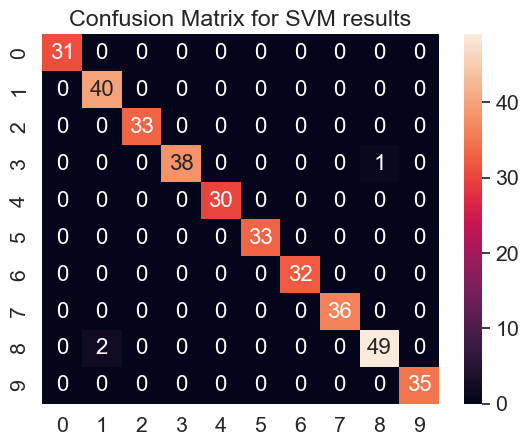

In [29]:
df_cm = pd.DataFrame(cmx)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
title = "Confusion Matrix for SVM results"
plt.title(title)
plt.show()

## Compare the different algorithms

In [33]:
algorithm = []
algorithm.append(('SVM', svm_classifier))
algorithm.append(('Logistic_L1', logreg))
algorithm.append(('Logistic_L2', LogisticRegression(C=0.01, penalty='l2', solver='saga', tol=0.1, multi_class='multinomial')))


results = []
names = []
y = digits.target
for name, algo in algorithm:
    k_fold = model_selection.KFold(n_splits=10, random_state=None)
    if name == 'SVM':
        X = flatten_digits
        cv_results = model_selection.cross_val_score(algo, X, y, cv=k_fold, scoring='accuracy')
    else:
        scaler = StandardScaler()
        X = scaler.fit_transform(flatten_digits)
        cv_results = model_selection.cross_val_score(algo, X, y, cv=k_fold, scoring='accuracy')
        
    results.append(cv_results)
    names.append(name)

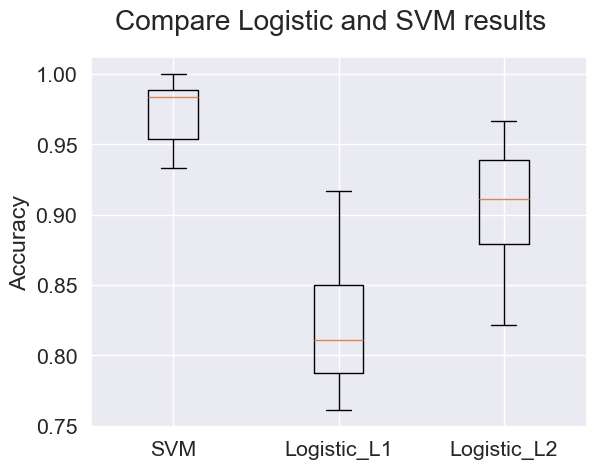

In [34]:
fig = plt.figure()
fig.suptitle('Compare Logistic and SVM results')
ax = fig.add_subplot()
plt.boxplot(results)
plt.ylabel('Accuracy')
ax.set_xticklabels(names)
plt.show()